# Assignment 5

In this assignment, you will use `Mask R-CNN` for object detection.  

First, set up the environment, and install dependent modules 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd gdrive/My\ Drive/Colab\ Notebooks/hw3

/content/gdrive/My Drive/Colab Notebooks/hw5


Downgrade `pytorch` to 1.4.0 and `torchvision` to 0.5.0

In [ ]:
!pip install torch===1.4.0 torchvision===0.5.0 -f https://download.pytorch.org/whl/torch_stable.html
!pip install ninja yacs cython matplotlib tqdm opencv-python

In [ ]:
!git clone https://github.com/cocodataset/cocoapi.git
%cd cocoapi/PythonAPI
!python setup.py build_ext install
%cd ../../

In [ ]:
!git clone https://github.com/mcordts/cityscapesScripts.git
%cd cityscapesScripts/
! python setup.py build_ext install

In [ ]:
%cd ../
!git clone https://github.com/NVIDIA/apex.git
%cd apex/
!python setup.py install --cuda_ext --cpp_ext

In [ ]:
%cd ../
!git clone https://github.com/facebookresearch/maskrcnn-benchmark.git
%cd maskrcnn-benchmark/
!python setup.py build develop

If you install them correctly, you will see folders `cityscapesScripts`, `apex`, `cocoapi`, and `maskrcnn-benchmark` in your working directory.  

Need to restart the runtime to proceed.

# Task 1: Object detection using pre-trained model

In [ ]:
%cd gdrive/My\ Drive/Colab\ Notebooks/hw3/maskrcnn-benchmark

/content/gdrive/My Drive/Colab Notebooks/hw5/maskrcnn-benchmark


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

import requests
from io import BytesIO
from PIL import Image
import numpy as np

# this makes our figures bigger
pylab.rcParams['figure.figsize'] = 16, 9

from maskrcnn_benchmark.config import cfg


In [ ]:
config_file = "configs/caffe2/e2e_mask_rcnn_R_50_FPN_1x_caffe2.yaml"

# update the config options with the config file
cfg.merge_from_file(config_file)
# manual override some options
cfg.merge_from_list(["MODEL.DEVICE", "cpu"])

In [ ]:
%run demo/predictor.py

In [ ]:
coco_demo = COCODemo(
    cfg,
    min_image_size=800,
    confidence_threshold=0.7,
)

Downloading: "https://dl.fbaipublicfiles.com/detectron/35858933/12_2017_baselines/e2e_mask_rcnn_R-50-FPN_1x.yaml.01_48_14.DzEQe4wC/output/train/coco_2014_train%3Acoco_2014_valminusminival/generalized_rcnn/model_final.pkl" to /root/.torch/models/_detectron_35858933_12_2017_baselines_e2e_mask_rcnn_R-50-FPN_1x.yaml.01_48_14.DzEQe4wC_output_train_coco_2014_train%3Acoco_2014_valminusminival_generalized_rcnn_model_final.pkl
/usr/local/lib/python3.6/dist-packages/torch/hub.py:436: UserWarning: torch.hub._download_url_to_file has been renamed to            torch.hub.download_url_to_file to be a public API,            _download_url_to_file will be removed in after 1.3 release
  _download_url_to_file will be removed in after 1.3 release')


In [ ]:
def load(url):
    """
    Given an url of an image, downloads the image and
    returns a PIL image
    """
    response = requests.get(url)
    pil_image = Image.open(BytesIO(response.content)).convert("RGB")
    # convert to BGR format
    image = np.array(pil_image)[:, :, [2, 1, 0]]
    return image

def imshow(img):
    plt.imshow(img[:, :, [2, 1, 0]])
    plt.axis("off")

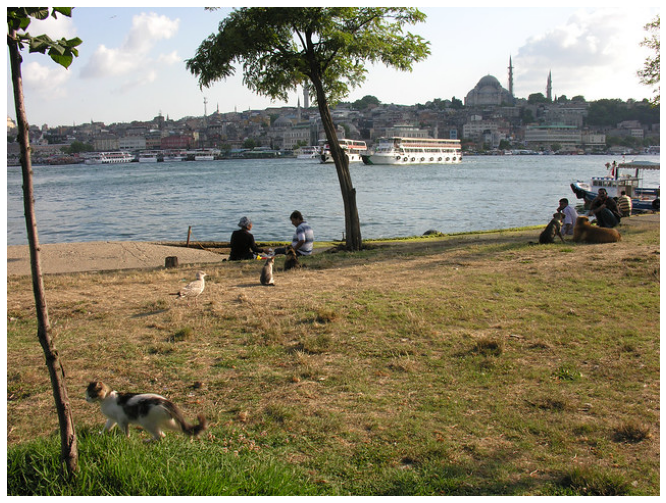

In [ ]:
image = load("http://farm3.staticflickr.com/2469/3915380994_2e611b1779_z.jpg")
imshow(image)

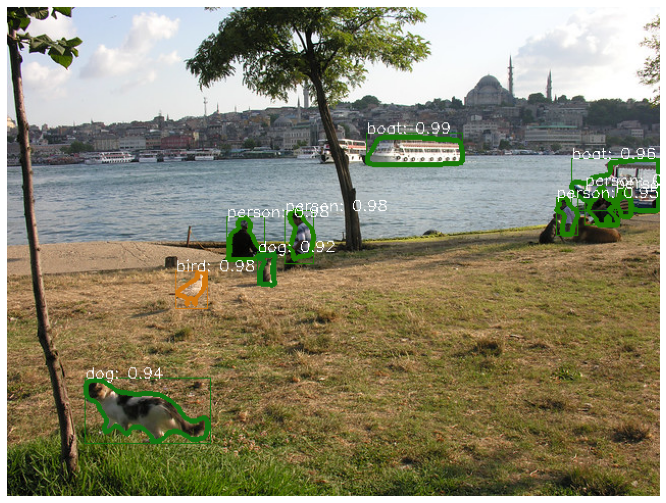

In [ ]:
predictions = coco_demo.run_on_opencv_image(image)
imshow(predictions)

# Task 2: COCO dataset

For this task, you'll need to download the `datasets` folder from [here](https://github.com/yuankaihuo/DL_course_hw/tree/master/Homework%205), and put it under `maskrcnn-benchmark`.   

Also, you'll need to download the config file `e2e_mask_rcnn_R_50_FPN_1x_yz.yaml` from that GitHub link, too. Put it under `maskrcnn-benchmark/configs/`

Restart runtime here

In [ ]:
%cd gdrive/My\ Drive/Colab\ Notebooks/hw3/maskrcnn-benchmark

/content/gdrive/My Drive/Colab Notebooks/hw5/maskrcnn-benchmark


Use COCO dataset (500 training, 200 validation, and 200 test) to train the model

In [ ]:
!python tools/train_net.py --config-file "configs/e2e_mask_rcnn_R_50_FPN_1x_yz.yaml"

2020-08-14 12:55:16,141 maskrcnn_benchmark INFO: Using 1 GPUs
2020-08-14 12:55:16,145 maskrcnn_benchmark INFO: Namespace(config_file='configs/e2e_mask_rcnn_R_50_FPN_1x_yz.yaml', distributed=False, local_rank=0, opts=[], skip_test=False)
2020-08-14 12:55:16,146 maskrcnn_benchmark INFO: Collecting env info (might take some time)
2020-08-14 12:55:17,604 maskrcnn_benchmark INFO: 
PyTorch version: 1.4.0
Is debug build: No
CUDA used to build PyTorch: 10.1

OS: Ubuntu 18.04.3 LTS
GCC version: (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
CMake version: version 3.12.0

Python version: 3.6
Is CUDA available: Yes
CUDA runtime version: 10.1.243
GPU models and configuration: GPU 0: Tesla K80
Nvidia driver version: 418.67
cuDNN version: /usr/lib/x86_64-linux-gnu/libcudnn.so.7.6.5

Versions of relevant libraries:
[pip3] numpy==1.18.5
[pip3] torch==1.4.0
[pip3] torchsummary==1.5.1
[pip3] torchtext==0.3.1
[pip3] torchvision==0.5.0
[conda] Could not collect
        Pillow (7.0.0)
2020-08-14 12:55:17,604 maskrcnn